# Topology of time series
This notebook explores how giotto-tda can be used to gain insights from time-varying data by using ideas from dynamical systems and persistent homology.

If you are looking at a static version of this notebook and would like to run its contents, head over to GitHub and download the source.

## Useful references

WEbsite: https://giotto-ai.github.io/gtda-docs/0.3.1/notebooks/topology_time_series.html

Topological Methods for the Analysis of Data by Jose Perea

The sliding window notebooks from Chris Tralie’s TDALabs

Detection of gravitational waves using topological data analysis and convolutional neural network: An improved approach by Christopher Bresten and Jae-Hun Jung. 

In [151]:
import numpy as np
import plotly.graph_objects as go
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from sklearn.decomposition import PCA


In [152]:
#Exemplo de serie temporal periodica
x_periodic = np.linspace(0, 10, 1000)
y_periodic = np.cos(5 * x_periodic)


In [153]:
#Exemplo de serie temporal que nao é periodica mas tem redudancia
x_nonperiodic = np.linspace(0, 50, 1000)
y_nonperiodic = np.cos(x_nonperiodic) + np.cos(np.pi * x_nonperiodic)

In [154]:
#Parametros para inicializar atributos da classe SingleTakensEmbedding
#Com parameters_type=search a inicialização da classe utiliza algoritmos de ML para encontrar parametros de dimensao e timedelay óptimos

#Dimensao máxima que a classe vai procurar pelo valor optimo
max_embedding_dimension = 30
#Time_delay maximo que a classe vai procurar pelo valor optimo
max_time_delay = 30
#O valor de stride nos permite fazer subamostragem. A janela desliza não de um em um mas pula de stride em stride
stride = 3

#Instanciamento do objeto
embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

In [155]:
y_periodic_embedded = embedder_periodic.fit_transform(y_periodic)

In [156]:
#Dimensão optima encontrada pelo algoritmo contido na classe
embedder_periodic.dimension_


9

In [157]:
#Time_delay optimo encontrado pelo algoritmo contido na classe
embedder_periodic.time_delay_


29

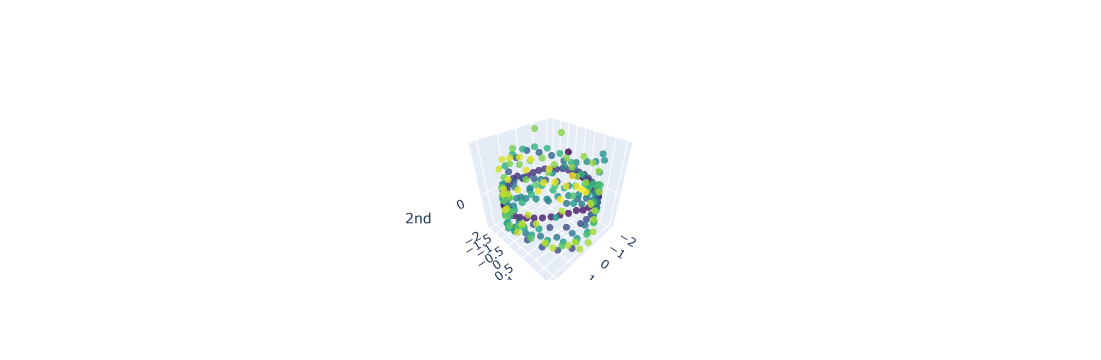

In [158]:
#Como a dimensão é alta utilizamos o PCA para reduzir a dimensão
pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

In [159]:
#Instanciamos o objeto relacionado ao sinal não periódico
embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="search",
    n_jobs=2,
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

In [160]:
y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)

In [161]:
embedder_nonperiodic.dimension_

10

In [162]:
embedder_nonperiodic.time_delay_

14

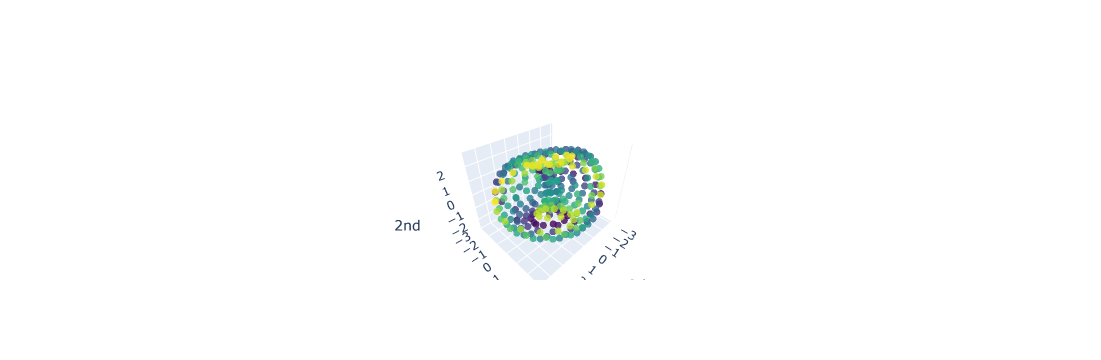

In [163]:
y_nonperiodic_embedded_pca = pca.fit_transform(y_nonperiodic_embedded)
plot_point_cloud(y_nonperiodic_embedded_pca)

In [164]:
#Temos que colocar a nuvem de pontos em um formato que a classe VietorisRipsPersistence aceite
y_periodic_embedded = y_periodic_embedded[None, :, :]
y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]

Persistence diagram for periodic signal


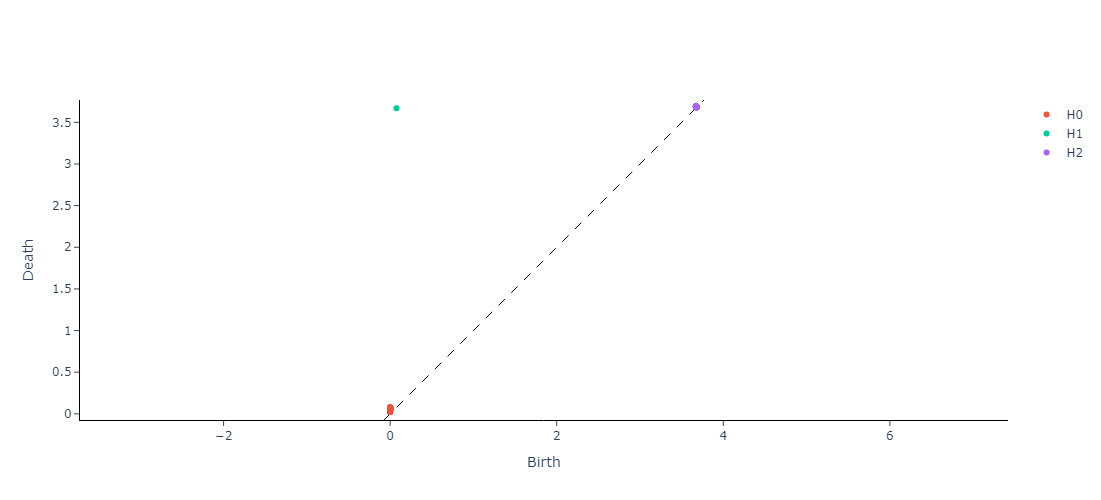

Persistence diagram for nonperiodic signal


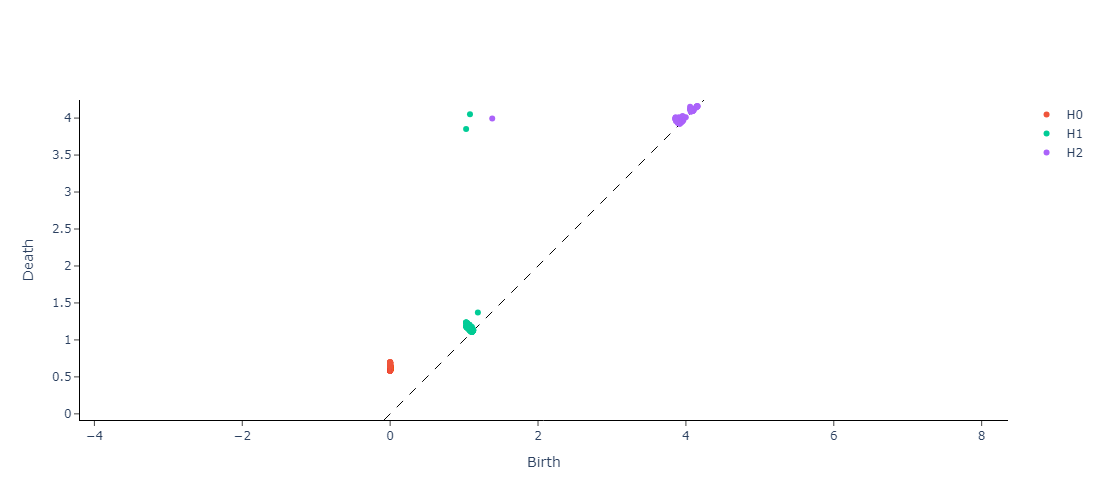

In [165]:
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(y_periodic_embedded)

nonperiodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for nonperiodic signal")
nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);